In [103]:

import pandas as pd
import numpy as np
pd.set_option("display.max_colwidth", 400)
pd.set_option('display.max_columns', 50)
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
pd.options.display.float_format = '{:.6f}'.format

In [ ]:
fantom_applications = pd.read_csv('./public_data/fantom_grant_applications.csv') 
fantom = pd.read_csv('./public_data/fantom_grant_votes.csv') 
fantom.info()
fantom.head()
# fantom_applications.info()
# fantom_applications.head()

In [ ]:
unicef_applications = pd.read_csv('./public_data/unicef_grant_applications.csv') 
unicef = pd.read_csv('./public_data/unicef_grant_votes.csv') 
unicef.info()
unicef.head()
# fantom_applications.info()
# unicef_applications.head()

In [163]:

# fantom[fantom.duplicated(subset=['id'])].count()
# unicef[fantom.duplicated(subset=['id'])].count()
tokens = unicef['token'].unique()
tokens

# fantom_token = fantom['token'].unique()
# fantom_token
# print(fantom['destination_wallet'].unique().shape) # 88
# print(unicef['destination_wallet'].unique().shape) # 10

array(['0x0000000000000000000000000000000000000000',
       '0x6b175474e89094c44da98b954eedeac495271d0f'], dtype=object)

In [170]:

unicef["decoded_amount"] = unicef["amount"].str[:-8]
# unicef[unicef["decoded_amount"] == '0']
unicef["decoded_amount"] = unicef["decoded_amount"].astype('float64') / (1e10)
unicef["decoded_amount"].describe()
unicef["round"] = "unicef"
unicef["amount_usd"] = None
eth_price = 1200
unicef.loc[unicef['token']=='0x0000000000000000000000000000000000000000','amount_usd']= unicef['decoded_amount'] * eth_price
unicef.loc[unicef['token']!='0x0000000000000000000000000000000000000000','amount_usd']= unicef['decoded_amount']
# unicef[unicef["token"] != "0x0000000000000000000000000000000000000000"].head()
unicef.loc[unicef['token'] == '0x0000000000000000000000000000000000000000','token_symbol']= "ETH"
unicef.loc[unicef['token'] == '0x6b175474e89094c44da98b954eedeac495271d0f','token_symbol']= "DAI"
# unicef[unicef["amount_usd"] == 0].head()
unicef.groupby("token_symbol").count()
unicef_cleaned = unicef[['round','id', 'source_wallet', 'destination_wallet', 'amount_usd', 'token_symbol']]
unicef_cleaned

,round,id,source_wallet,destination_wallet,amount_usd,token_symbol
0,unicef,11f159yjRryCZgNBebpqaa8FUCpApzNtkW2SBpY9EQL,0xe95ab07a55e8489fe8e81e3281c8b3fd95c7d8af,0xd27e1a1a60ebc1b70f4cae5265092c0f6edc7f9d,1.200000,ETH
1,unicef,121Bu9DQH2XYZRmpc4MBME9u31VbztuffyzZawSHyx5W,0x7d1ef741c40ddffdd4f19549d42fed9a0193f8ea,0x39d77e51c485f1ff65b1b3b42e9f67cda221f597,1.020000,ETH
2,unicef,121BYEFrztQ8dvngkt2AWtnt6xPMmN2zjhoBC8R3u1cq,0xbc70bc022ebc5e4cc99e7ecc3b69f6ab47f43c3c,0x39d77e51c485f1ff65b1b3b42e9f67cda221f597,0.018000,ETH
3,unicef,122Ha1gzuyYsPxqJtRzhr7uFKtpxn7eMuW9wW2xnKyBg,0x329c787b163a730bd7900df2beb3ff4fe4670375,0x8ddfa84bbf59c0e6dbd05a56e9b9931b64255f08,0.120000,ETH
4,unicef,124h8Un1Gr6ALnvowt3fUPUVrnHwjcrGqPctV9x1esfh,0x49c9fb3402dc8a7f36b784d42aef56639dc89178,0x0e5c6c79f44a19d98dd58d4c22d3a2fbd555eebe,0.120000,ETH
...,...,...,...,...,...,...
64175,unicef,ZyeeNyEyf2DtzhHW2zGNRzspKvUfBw5ES47mPq2ygoT,0xa944e92483ddc42e70358760d4a5276be8e82767,0x6078c8eeb7ed8916a8f1e85dc8f6e780c09a89ff,0.120000,ETH
64176,unicef,ZYgRkSwRZKa1wTwtbrGHfjXSBadLcaEw6s4p5TRrThw,0x9cb6b0a109ad9b1f029107f40737f6ceb64d356b,0x6078c8eeb7ed8916a8f1e85dc8f6e780c09a89ff,1.200000,ETH
64177,unicef,zyKixuBf5Y33WRVn4mEM3gm8Q1DwmAfy6KhsbZUwY7K,0x43cb33e6f2bada9d359e31d42b7da5ee848100a9,0x6078c8eeb7ed8916a8f1e85dc8f6e780c09a89ff,1.272000,ETH
64178,unicef,ZzpcqAFmmUdJ98fp9W27ZWBrBw5DLQWffBHjLL8PrtT,0x95f3955648d5dca694880cef87df9f368ef78728,0x6078c8eeb7ed8916a8f1e85dc8f6e780c09a89ff,0.480000,ETH


In [169]:

fantom["decoded_amount"] = fantom["amount"].str[:-8]

fantom = fantom[fantom["amount"] != '0']
fantom["decoded_amount"] = fantom["decoded_amount"].astype('float64') / (1e10)
fantom["round"] = "fantom"
# fantom["decoded_amount"].describe()
fantom["amount_usd"] = None
ftm_price = 0.21
fantom.loc[fantom['token']=='0x0000000000000000000000000000000000000000','amount_usd']= fantom['decoded_amount'] * ftm_price
fantom.loc[fantom['token']!='0x0000000000000000000000000000000000000000','amount_usd']= fantom['decoded_amount']
# fantom[fantom["token"] != "0x0000000000000000000000000000000000000000"].head() 
fantom.loc[fantom['token'] == '0x0000000000000000000000000000000000000000','token_symbol']= "FTM"
fantom.loc[fantom['token'] == '0xc931f61b1534eb21d8c11b24f3f5ab2471d4ab50','token_symbol']= "BUSD"
fantom.loc[fantom['token'] == '0x21be370d5312f44cb42ce377bc9b8a0cef1a4c83','token_symbol']= "WFTM"
fantom.loc[fantom['token'] == '0x8d11ec38a3eb5e956b052f67da8bdc9bef8abf3e','token_symbol']= "DAI"
fantom.groupby("token_symbol").count()
fantom_cleaned = fantom[['round','id', 'source_wallet', 'destination_wallet', 'amount_usd', 'token_symbol']]

,round,id,source_wallet,destination_wallet,amount_usd,token_symbol
0,fantom,113dRUPwQJ9tTfeqeMRq2Mn8kfYrNyakTPdEhqFkVSe,0x06cd8288dc001024ce0a1cf39caaedc0e2db9c82,0xe126b3e5d052f1f575828f61feba4f4f2603652a,0.210000,FTM
1,fantom,11n4hU8NKy7gr5oBqJ1AeEyBKV7L47JGLpbrskoDBcf,0x9be7d88cfd6e4b519cd9720db6de6e6f2c1ca77e,0x7d658841f8ba93299970f6e765c2ce205f1e70dd,1.029000,FTM
2,fantom,121GYrfeHauo1PYZFjgWgdAAJnFL8JGNkSauUM8XysS3,0xf8bde71eb161bd83da88bd3a1003eef9ba0c7485,0x9a8568782896c4d4153b8b4d7e440e84e2c2cfbb,0.210000,FTM
3,fantom,121TsER62NNHzRq8MojbiC5gRSFiTaFM3LkHUFFxu1i4,0x1994bc4f630a373ffc3ecef84165cfb85e7f7820,0xf28ef4580f514eca5c1b75d0db9b0cb6d62d83ef,0.060900,FTM
4,fantom,122jc868KSeMmaMezGebsLd9LMhRk1QgMVLj1z2yY3LS,0x13ef1086cdfecc00e0f8f3b2ac2c600f297dc333,0x7ea6b8906a0b33cbdb9582d31364f522395eb0ea,0.597303,FTM
...,...,...,...,...,...,...
139332,fantom,zZHbzty3kpakicygboUmFanVUrXw14itXwbRh8aJH3W,0x9a74ec99bd88eca680485da7f32fca05af375dcf,0xda0d1b7995e652288ac13540915b899a51d2be50,0.105000,FTM
139333,fantom,zZLKvx8Z6SmRNseE4vmFxfZYVS1HPixJBwGnu4RbSzh,0x3ca0eb2c2db71c819fdd4d7a94e47adf2f4bb1ba,0x112e372bb5ec17c1ea6b1d679ea72afbd2a94404,0.021000,FTM
139334,fantom,zZRNJU9nR71i6ZZhp5WgivCYNchZhkjsXksjtzjCuum,0xbe1bd91b57ce069ce85ec5304cf9d206a3be85df,0x879e5ea3f8b0d5e368a59f79ad8969025953b1f1,1.470000,FTM
139335,fantom,zZVnxEoeJwqPsnMvqRba5ZChqaMtjU4mMgALBxCEiLq,0x6273957eb6707f6e935d8b190bd239ccae0eb7cb,0x76c354c136fa7518f87d92e3d8fae40c0261ec19,0.010500,FTM


In [176]:
gr15 = pd.read_csv('./public_data/gr15_contributions.csv') 
gr15_grants = pd.read_csv('./public_data/gr15_grants.csv') 
gr15_cleaned = pd.DataFrame()
gr15_cleaned["round"] = "gr"
gr15_cleaned['id'] = gr15['txn_id']
gr15_cleaned['source_wallet'] = gr15['address']
gr15_cleaned['destination_wallet'] = gr15['address']
gr15_cleaned['amount_usd'] = gr15['amount_in_usdt']
gr15_cleaned['token_symbol'] = gr15['token']


gr15_cleaned

,round,id,source_wallet,destination_wallet,amount_usd,token_symbol
0,NaN,9a7955760b945121d7ac2e3ccf8c53bb19389939d83a78dba0a03d21def8dbea,0x76f69dcddd0593b0aff5fd3280c3433ddb68e0d2,0x76f69dcddd0593b0aff5fd3280c3433ddb68e0d2,1.283650,ETH
1,NaN,8d656b874ef8b642bbab30e2e0164922287d8156182e614226e80ae3911f7507,0x1bc5ebee4738fd95bd96751c45a90889f772e0f3,0x1bc5ebee4738fd95bd96751c45a90889f772e0f3,1.001247,ETH
2,NaN,fe14bb2c777595fcc407de7ec454e26ddaa48df2c11a6e9a29a7c98305ce6ceb,0x3812801cbf0e41413db4835a5e36228ad45e32bf,0x3812801cbf0e41413db4835a5e36228ad45e32bf,1.001943,MATIC
3,NaN,1d5435fae1a9942df47eb4a30c49acf418888fc7bbd233ef14cf236425de07ca,0x1bc5ebee4738fd95bd96751c45a90889f772e0f3,0x1bc5ebee4738fd95bd96751c45a90889f772e0f3,1.001247,ETH
4,NaN,e3aa9456a2fac0019086e42b9a065ac0e40d108e436d1bedec977f8672908f67,0x1bc5ebee4738fd95bd96751c45a90889f772e0f3,0x1bc5ebee4738fd95bd96751c45a90889f772e0f3,1.001247,ETH
...,...,...,...,...,...,...
432337,NaN,cc2d1638c813a3401e41d70de25d9969b1efa8dc40138ee109755e345da1b924,0x397cf4c40dd1292b098bd3ac3cf8656ad3919126,0x397cf4c40dd1292b098bd3ac3cf8656ad3919126,1.503795,ETH
432338,NaN,a4eb44a3d03517b02734bfd7d2f11c4e7ebfe65d81be669fb39151f87d2c5c25,0x397cf4c40dd1292b098bd3ac3cf8656ad3919126,0x397cf4c40dd1292b098bd3ac3cf8656ad3919126,1.503795,ETH
432339,NaN,02762dfe4b4fc71c88f99dce477654de78a56e65ada5e3ee61ca26793e6b90bc,0x397cf4c40dd1292b098bd3ac3cf8656ad3919126,0x397cf4c40dd1292b098bd3ac3cf8656ad3919126,1.503795,ETH
432340,NaN,3cfe76b9d575aa75911a0479362984f61ac90edf06c9eebfc424fb19075fd6eb,0x397cf4c40dd1292b098bd3ac3cf8656ad3919126,0x397cf4c40dd1292b098bd3ac3cf8656ad3919126,1.503795,ETH


In [91]:
combined = pd.concat([fantom, unicef])
combined.to_csv('./analytics_data/combined_contributions.csv', index=False)

<AxesSubplot: xlabel='round', ylabel='amount_usd'>

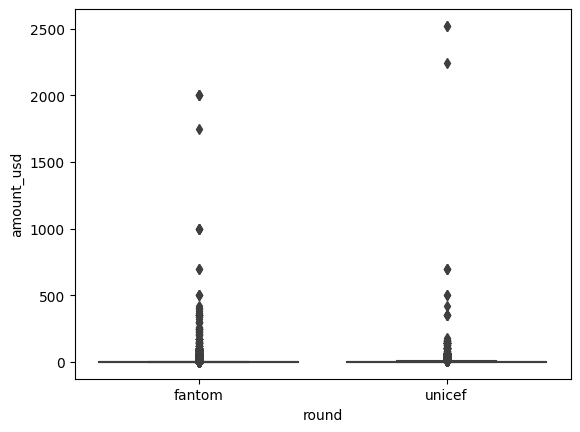

In [104]:
contributions = pd.read_csv('./analytics_data/combined_contributions.csv') 
contributions["amount_usd"].sum()
sns.boxplot(x='round', y='amount_usd', data=contributions)

In [154]:
grants = contributions.groupby(['round', 'destination_wallet']).sum()[['amount_usd']]
grants['total_contributions'] = contributions.groupby(['round', 'destination_wallet']).count()['id']
grants['total_contributors'] = contributions.groupby(['round', 'destination_wallet']).nunique()['source_wallet']
grants['avg_amount_usd'] = grants['amount_usd'] / grants['total_contributions']
grants.reset_index(inplace=True)

# grants[grants['round'] == 'fantom'].describe()
# grants[grants['round'] == 'unicef'].describe()
grants.describe()
# grants[grants['destination_wallet'] == '0x007db5de853d723a96e0e28cce72cca897b00ecf']
# sns.boxplot(x='round', y='amount_usd', data=grants)

/var/folders/gl/3nbwj5r1183_gfp3xql0hclr0000gn/T/ipykernel_62248/3749618972.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grants = contributions.groupby(['round', 'destination_wallet']).sum()[['amount_usd']]


,amount_usd,total_contributions,total_contributors,avg_amount_usd
count,98.000000,98.000000,98.000000,98.000000
mean,2580.493403,2076.693878,2000.418367,0.921982
std,3615.157326,1919.257086,1858.597204,0.729795
min,138.539344,795.000000,764.000000,0.167318
25%,334.319331,922.000000,883.500000,0.339318
50%,796.537521,1147.500000,1100.500000,0.642317
75%,3030.379066,2125.250000,2007.750000,1.430194
max,16778.289060,8880.000000,8562.000000,3.681712
